In [5]:
%matplotlib inline
#standard imports 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# There are three (obligatory) problems to solve due 6.11

1.k-NN Problem

2.Bayes value Problem

3.Expectated value Problem

# 1. The first problem should be solved according to the guidelines from

https://github.com/wkrzemien/dataScienceAndML2020/blob/master/notebooks/knn/knn_first.ipynb

# 1. KNN algorithm has three steps:

(1) Calculate Euclidean Distance.

(2) Get Nearest Neighbors.

(3) Make Predictions.


File available here: http://koza.if.uj.edu.pl/~krzemien/machine_learning2021/materials/datasets/iris_data.csv

In [9]:
input_file = 'iris_data.csv'

In [10]:
data = pd.read_csv(input_file)

In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [15]:
dataSetosa=data[data['species']=='Iris-setosa']
dataVersicolor=data[data['species']=='Iris-versicolor']
dataVirginica=data[data['species']=='Iris-virginica']
datasets =[dataSetosa,dataVersicolor,dataVirginica]

In [16]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [17]:
data.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [18]:

def plotDatasets(datasets, dataSetsLabels, columnsToPlot=None, xLabel='x', yLabel='y', ):
    """
    Args:
      columnsToPlot(list): list of numbers corresponding to columns that should be plotted.
                           e.g. if we want to plot 3rd column  vs 4th column columnsToPlot should be
                           a list [2,3]. By default it is 1rst vs 2nd so [0,1]

    """
    colors = ['red','green','blue'] 
    if not columnsToPlot:
        columnsToPlot = [0, 1]
    for d, dlabel, color in zip(datasets, dataSetsLabels, colors):
        xdata = d.iloc[:, columnsToPlot[0]]
        ydata = d.iloc[:, columnsToPlot[1]]
        plt.scatter(xdata, ydata, label=dlabel, color = color)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
    plt.legend()
    plt.show()
  # plt.savefig('plot.png') #save figure to file

In [19]:
dLabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

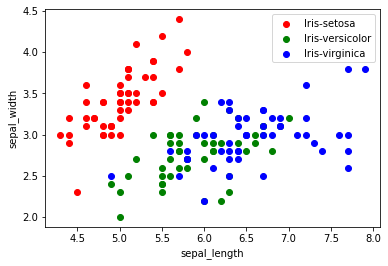

In [20]:
plotDatasets(datasets, dLabels, [0, 1], 'sepal_length', 'sepal_width')

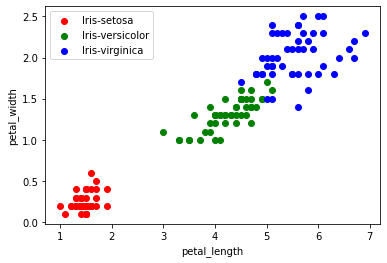

In [21]:
plotDatasets(datasets, dLabels, [2, 3], 'petal_length', 'petal_width')

In [22]:
def distance(x,y):
    xx=np.array(x)
    yy=np.array(y)
    return np.sqrt(np.sum(np.square(xx-yy)))

In [23]:
#from operator import itemgetter - I didn t use that, but could have

def getNeighbours(x, Xtrain, Ytrain, metric=distance):    
    #Function should return neighbours of x, sorted by distance from x. 
    neighbours=[[distance(x,Xtrain[i]),Xtrain[i],Ytrain[i]] for i in range(len(Xtrain))]
    neighbours.sort(key=lambda a: a[0])   
    return neighbours

In [24]:
def getKNNeighbours(neighbours, k):    
    #Function should return k nearest neighbours assuming that neighbours are already sorted by distance.
    knn_neighbours = neighbours[:k]   
    return knn_neighbours

In [25]:
def majorityVote(neighbours):
    #Return the average of class labels  
    neighbour_arr = np.array([neighbours[i][2] for i in range(len(neighbours))]) 
    return np.average(neighbour_arr)

In [26]:
def predict(x, Xtrain, Ytrain, k):
    neighbours = getNeighbours(x, Xtrain, Ytrain, metric=distance) 
    knn_neighbours = getKNNeighbours(neighbours, k)
    prediction = majorityVote(knn_neighbours)   
    if prediction >= 0.5:
        pred=1
    else:
        pred=0
    return pred

def predictList(xObjects, Xtrain, Ytrain, k):  
    
    list_predictions = []
    
    for x in xObjects:
        list_predictions.append(predict(x, Xtrain, Ytrain, k))
    
    return list_predictions

In [27]:
def meanSquaredError(v, w):
    #brute-force solution
    #mean_squared_error = 0
    #for i in range(len(v)):
    #    mean_squared_error += math.pow(v[i] - w[i], 2)
    #    return math.sqrt(mean_squared_error)
    
    #numpy solution
    vv=np.array(v)
    ww=np.array(w)
    mse = (np.square(vv - ww)).mean(axis=0)
    return mse

In [28]:
def plotErrors(x, train,valid):
    plt.plot(x, train, label='training error')
    plt.plot(x, valid, label='test error')
    plt.xlabel('k')
    plt.legend()
    plt.show()
    
def plotErrors_samples(x, train,valid):
    plt.plot(x, train, label='training error')
    plt.plot(x, valid, label='test error')
    plt.xlabel('number of samples')
    plt.legend()
    plt.show()
  #plt.savefig('errors.png') #save figure to file

In [29]:
def divideData(dataSet, fraction):
    nbTotal = len(ddataSet.index)
    nbTrain = int(nbTotal*fraction)
    return (dataSet.iloc[:nbTrain,:], dataSet.iloc[nbTrain:,:])

In [30]:
def runTests():
    # some tests of distance function
    np.testing.assert_almost_equal(distance([1, 1], [1, 1]), 0)
    np.testing.assert_almost_equal(distance([2, 0, 1], [5, 0, 1]), 3)
    np.testing.assert_almost_equal(distance([0, 0], [2, 2]), np.sqrt(8))

    # some tests of getNeighbours function
    Xtrain = [[2, 0], [0, 0],  [1, 0]]
    Ytrain = [1, 0, 1]
    x = [-1, 0]  # with respect to x we calculate the distance
    result = getNeighbours(x, Xtrain, Ytrain)
    expected = ((1, [0, 0], 0), (2, [1, 0], 1), (3, [2, 0], 1))
    np.testing.assert_equal(result, expected)

    # some tests of getKNNeighbours function
    data = [[1, [0, 0], 0], [2, [1, 0], 1], [3, [2, 0], 1]]
    np.testing.assert_equal(getKNNeighbours(data,  k=1), [[1, [0, 0], 0]])
    np.testing.assert_equal(getKNNeighbours(data,  k=2), [[1, [0, 0], 0], [2, [1, 0], 1]])

    # some tests of majorityVote function
    data = [[1, [0, 0], 0], [2, [1, 0], 1], [3, [2, 0], 1]]
    np.testing.assert_equal(majorityVote(data), 2./3.)

    # some tests of predict function
    xTrain = [[0, 0], [1, 0], [2, 0]]
    yTrain = [0, 1, 1]
    x = [-1, 0]
    k = 1
    np.testing.assert_almost_equal(predict(x, xTrain, yTrain, k), 0)
    k = 2
    np.testing.assert_almost_equal(predict(x, xTrain, yTrain, k), 1)
    k = 3
    np.testing.assert_almost_equal(predict(x, xTrain, yTrain, k), 1)

    # some tests of predictList function
    xTrain = [[0, 0], [1, 0], [2, 0]]
    yTrain = [0, 1, 1]
    xToClassify = [[-1, 0], [3, 0]]
    k = 1
    np.testing.assert_almost_equal(predictList(xToClassify, xTrain, yTrain, k), [0., 1.])

In [31]:
runTests()

In [32]:
class kNN(object):
    def __init__(self, n_neighbours):
        self.n_neighbours = n_neighbours
        self.Xtrain = []
        self.Ytrain = []
    def fit(self, x,y):
        self.Xtrain = x
        self.Ytrain = y
    def predict(self, Xobjects):
        return predictList(Xobjects,self.Xtrain, self.Ytrain, self.n_neighbours)

In [38]:
classLabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
columnLabels = ['sepal_length', 'sepal_width',
                  'petal_length', 'petal_width', 'species']
# First let's try  Iris-setosa vs Iris-versicolor, two features sepal-length vs sepal-width
# we get rid of the third class Iris-viriginica
dataWithoutSetosa = data[data['species'] != 'Iris-setosa']

def toNumeric(row):
    if row.species == 'Iris-versicolor':
        return 0
    else:
        return 1

dataWithoutSetosa['class']=dataWithoutSetosa.apply(lambda row:toNumeric(row),axis=1)
  
# we leave only sepal_length, sepal_width and class label columns
columnsToLeave=['sepal_length', 'sepal_width', 'class']  
dataSepal = dataWithoutSetosa[columnsToLeave]

dataSepal.head()

<ipython-input-38-835571e504c9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithoutSetosa['class']=dataWithoutSetosa.apply(lambda row:toNumeric(row),axis=1)


,sepal_length,sepal_width,class
50,7.0,3.2,0
51,6.4,3.2,0
52,6.9,3.1,0
53,5.5,2.3,0
54,6.5,2.8,0


In [39]:
fraction = 0.8
# we  divide the content into the training and validation set
# we also randomly shuffle the content
trainingSet=dataSepal.sample(frac=fraction)
validationSet=dataSepal.drop(trainingSet.index)
validationSet=validationSet.sample(frac=1)

print(len(trainingSet))
print(type(trainingSet))

#There was a mistake here in the instructor's code I corrected it see below:
xTrain = trainingSet.iloc[:, 0:2].values.tolist()
yTrain = trainingSet.iloc[:, 2].values.tolist()
xValid = validationSet.iloc[:, 0:2].values.tolist()
yValid = validationSet.iloc[:, 2].values.tolist()

print(xValid[0])
print(yValid[0])
print(validationSet.head(20))

80
<class 'pandas.core.frame.DataFrame'>
[5.5, 2.3]
0
     sepal_length  sepal_width  class
53            5.5          2.3      0
113           5.7          2.5      1
128           6.4          2.8      1
65            6.7          3.1      0
69            5.6          2.5      0
127           6.1          3.0      1
144           6.7          3.3      1
56            6.3          3.3      0
99            5.7          2.8      0
135           7.7          3.0      1
142           5.8          2.7      1
112           6.8          3.0      1
50            7.0          3.2      0
116           6.5          3.0      1
146           6.3          2.5      1
109           7.2          3.6      1
141           6.9          3.1      1
98            5.1          2.5      0
143           6.8          3.2      1
108           6.7          2.5      1


In [40]:
xTrain_sample=[]
yTrain_sample=[]
xValid_sample=[]
yValid_sample=[]

for i in range(0,8):
    xTrain_sample.append(trainingSet[:((i+1)*10)].iloc[:, 0:2].values.tolist())
    yTrain_sample.append(trainingSet[:((i+1)*10)].iloc[:, 2].values.tolist())
    xValid_sample.append(validationSet[:((i+1)*10)].iloc[:, 0:2].values.tolist())
    yValid_sample.append(validationSet[:((i+1)*10)].iloc[:, 2].values.tolist())

print(type(xTrain_sample))
print(np.array(xTrain_sample[5]).shape)

<class 'list'>
(60, 2)


In [41]:
if fraction < 1:
    #we calculate training error and validation error
    trainError=[]
    validError=[]
    kRange =range(1,80)
    trainPredictions = predictList(xTrain, xTrain, yTrain, 1)
    for k in kRange:
        trainPredictions = predictList(xTrain, xTrain, yTrain, k)
        validationPredictions = predictList(xValid, xTrain, yTrain, k)
        trainError.append(meanSquaredError(trainPredictions,yTrain))
        validError.append(meanSquaredError(validationPredictions,yValid))

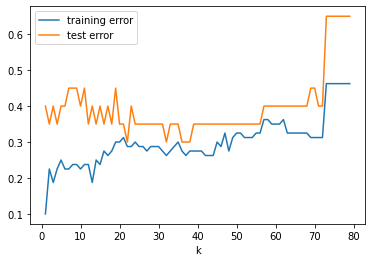

In [42]:
plotErrors(kRange, trainError,validError)

In [43]:
if fraction < 1:
    #we calculate training error and validation error
    trainError_sample=[]
    validError_sample=[]
    
    #trainPredictions_sample = predictList(xTrain_sample, xTrain_sample, yTrain_sample, 1)
    
    k=10
    
    for i in range(0,8):        
        if (i+1)*10<k:
            trainPredictions_sample = predictList(xTrain_sample[i], xTrain_sample[i], yTrain_sample[i],k)
            validationPredictions_sample = predictList(xValid_sample[i], xTrain_sample[i], yTrain_sample[i],k)
            trainError_sample.append(meanSquaredError(trainPredictions_sample,yTrain_sample[i]))
            validError_sample.append(meanSquaredError(validationPredictions_sample,yValid_sample[i])) 
        else:
            pass
            trainPredictions_sample = predictList(xTrain_sample[i], xTrain_sample[i], yTrain_sample[i], k)
            validationPredictions_sample = predictList(xValid_sample[i], xTrain_sample[i], yTrain_sample[i], k)
            trainError_sample.append(meanSquaredError(trainPredictions_sample,yTrain_sample[i]))
            validError_sample.append(meanSquaredError(validationPredictions_sample,yValid_sample[i]))

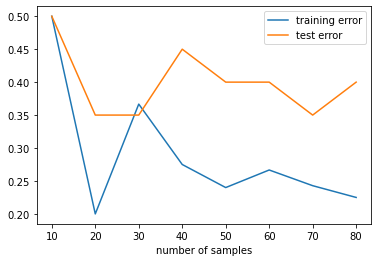

In [44]:
plotErrors_samples(np.arange(10,90,10), trainError_sample, validError_sample)

### Normalisation

Normalisation can be defined as rescaling real valued numeric attributes into the range 0 and 1.

In [45]:
#In sklearn library there is a function called preprocessing enabling dataset normalisation.
from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()
training_scaled2 = min_max_scaler.fit_transform(trainingSet.iloc[:,[0,1]])
training_normalised2 = pd.DataFrame(training_scaled2)

 
validation_scaled2 = min_max_scaler.transform(validationSet.iloc[:,[0,1]])
validation_normalised2 = pd.DataFrame(validation_scaled2)

print(type(training_normalised2))
print(training_normalised2.head())

print(type(validation_normalised2))
print(validation_normalised2.head())

<class 'pandas.core.frame.DataFrame'>
          0         1
0  0.266667  0.555556
1  0.400000  0.444444
2  1.000000  1.000000
3  0.366667  0.555556
4  0.366667  0.777778
<class 'pandas.core.frame.DataFrame'>
          0         1
0  0.200000  0.166667
1  0.266667  0.277778
2  0.500000  0.444444
3  0.600000  0.611111
4  0.233333  0.277778


In [47]:
#There was a mistake here in the instructor's code I corrected it see below:
xTrain2 = training_normalised2.iloc[:, 0:2].values.tolist()
yTrain2 = trainingSet.iloc[:, 2].values.tolist()
xValid2 = validation_normalised2.iloc[:, 0:2].values.tolist()
yValid2 = validationSet.iloc[:, 2].values.tolist()

print(xValid2[0])
print(yValid2[0])

[0.19999999999999996, 0.16666666666666652]
0


In [48]:
xTrain_sample2=[]
yTrain_sample2=[]
xValid_sample2=[]
yValid_sample2=[]

for i in range(0,8):
    xTrain_sample2.append(training_normalised2[:((i+1)*10)].iloc[:, 0:2].values.tolist())
    yTrain_sample2.append(trainingSet[:((i+1)*10)].iloc[:, 2].values.tolist())
    xValid_sample2.append(validation_normalised2[:((i+1)*10)].iloc[:, 0:2].values.tolist())
    yValid_sample2.append(validationSet[:((i+1)*10)].iloc[:, 2].values.tolist())

print(type(xTrain_sample2))
print(np.array(xTrain_sample2[5]).shape)

<class 'list'>
(60, 2)


In [49]:
if fraction < 1:
    #we calculate training error and validation error
    trainError2=[]
    validError2=[]
    kRange =range(1,80)
    trainPredictions2 = predictList(xTrain2, xTrain2, yTrain2, 1)
    for k in kRange:
        trainPredictions2 = predictList(xTrain2, xTrain2, yTrain2, k)
        validationPredictions2 = predictList(xValid2, xTrain2, yTrain2, k)
        trainError2.append(meanSquaredError(trainPredictions2,yTrain2))
        validError2.append(meanSquaredError(validationPredictions2,yValid2))

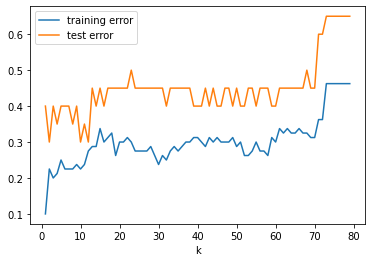

In [50]:
plotErrors(kRange, trainError2,validError2)

In [54]:
if fraction < 1:
    #we calculate training error and validation error
    trainError_sample2=[]
    validError_sample2=[]
    
    #trainPredictions_sample = predictList(xTrain_sample, xTrain_sample, yTrain_sample, 1)
    
    k=10
    
    for i in range(0,8):        
        if (i+1)*10<k:
            trainPredictions_sample2 = predictList(xTrain_sample2[i], xTrain_sample2[i], yTrain_sample2[i],k)
            validationPredictions_sample2 = predictList(xValid_sample2[i], xTrain_sample2[i], yTrain_sample2[i],k)
            trainError_sample2.append(meanSquaredError(trainPredictions_sample2,yTrain_sample2[i]))
            validError_sample2.append(meanSquaredError(validationPredictions_sample2,yValid_sample2[i])) 
        else:
            pass
            trainPredictions_sample2 = predictList(xTrain_sample2[i], xTrain_sample2[i], yTrain_sample2[i], k)
            validationPredictions_sample2 = predictList(xValid_sample2[i], xTrain_sample2[i], yTrain_sample2[i], k)
            trainError_sample2.append(meanSquaredError(trainPredictions_sample2,yTrain_sample2[i]))
            validError_sample2.append(meanSquaredError(validationPredictions_sample2,yValid_sample2[i]))

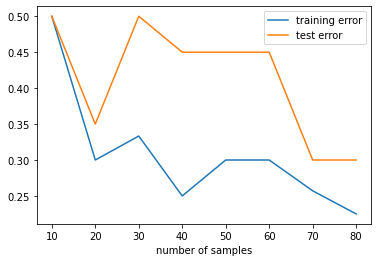

In [55]:
plotErrors_samples(np.arange(10,90,10), trainError_sample2, validError_sample2)

### Standarisation

Standardisation can be defined as shifting the distribution of each attribute to have a mean of zero and a unit variance.

In [65]:
#In sklearn library there is a function called preprocessing enabling dataset standarisation.
from sklearn import preprocessing

training3 = trainingSet #returns a numpy array
std_scaler = preprocessing.StandardScaler()
training_scaled3 = std_scaler.fit_transform(training3.iloc[:,[0,1]])
training_standardised3 = pd.DataFrame(training_scaled3)

validation3 = validationSet #returns a numpy array
validation_scaled3 = std_scaler.transform(validation3.iloc[:,[0,1]])
validation_standardised3 = pd.DataFrame(validation_scaled3)

print(type(training_standardised3))
print(training_standardised3.head())

print(type(validation_standardised3))
print(validation_standardised3.head())

<class 'pandas.core.frame.DataFrame'>
          0         1
0 -0.806276  0.407487
1 -0.202041 -0.201839
2  2.517017  2.844791
3 -0.353100  0.407487
4 -0.353100  1.626139
<class 'pandas.core.frame.DataFrame'>
          0         1
0 -1.108394 -1.725154
1 -0.806276 -1.115828
2  0.251135 -0.201839
3  0.704312  0.712150
4 -0.957335 -1.115828


In [66]:
#There was a mistake here in the instructor's code I corrected it see below:
xTrain3 = training_standardised3.iloc[:, 0:2].values.tolist()
yTrain3 = trainingSet.iloc[:, 2].values.tolist()
xValid3 = validation_standardised3.iloc[:, 0:2].values.tolist()
yValid3 = validationSet.iloc[:, 2].values.tolist()

print(xValid3[0])
print(yValid3[0])

[-1.1083938815668586, -1.7251541905129848]
0


In [67]:
xTrain_sample3=[]
yTrain_sample3=[]
xValid_sample3=[]
yValid_sample3=[]

for i in range(0,8):
    xTrain_sample3.append(training_standardised3[:((i+1)*10)].iloc[:, 0:2].values.tolist())
    yTrain_sample3.append(trainingSet[:((i+1)*10)].iloc[:, 2].values.tolist())
    xValid_sample3.append(validation_standardised3[:((i+1)*10)].iloc[:, 0:2].values.tolist())
    yValid_sample3.append(validationSet[:((i+1)*10)].iloc[:, 2].values.tolist())

print(type(xTrain_sample3))
print(np.array(xTrain_sample3[5]).shape)

<class 'list'>
(60, 2)


In [68]:
if fraction < 1:
    #we calculate training error and validation error
    trainError3=[]
    validError3=[]
    kRange =range(1,80)
    trainPredictions3 = predictList(xTrain3, xTrain3, yTrain3, 1)
    for k in kRange:
        trainPredictions3 = predictList(xTrain3, xTrain3, yTrain3, k)
        validationPredictions3 = predictList(xValid3, xTrain3, yTrain3, k)
        trainError3.append(meanSquaredError(trainPredictions3,yTrain3))
        validError3.append(meanSquaredError(validationPredictions3,yValid3))

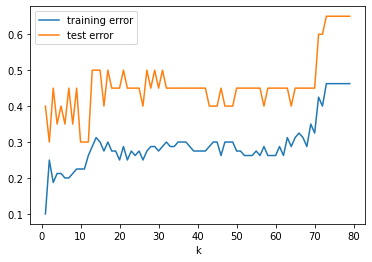

In [69]:
plotErrors(kRange, trainError3,validError3)

In [70]:
if fraction < 1:
    #we calculate training error and validation error
    trainError_sample3=[]
    validError_sample3=[]
    
    #trainPredictions_sample = predictList(xTrain_sample, xTrain_sample, yTrain_sample, 1)
    
    k=10
    
    for i in range(0,8):        
        if (i+1)*10<k:
            trainPredictions_sample3 = predictList(xTrain_sample3[i], xTrain_sample3[i], yTrain_sample3[i],k)
            validationPredictions_sample3 = predictList(xValid_sample3[i], xTrain_sample3[i], yTrain_sample3[i],k)
            trainError_sample3.append(meanSquaredError(trainPredictions_sample3,yTrain_sample3[i]))
            validError_sample3.append(meanSquaredError(validationPredictions_sample3,yValid_sample3[i])) 
        else:
            pass
            trainPredictions_sample3 = predictList(xTrain_sample3[i], xTrain_sample3[i], yTrain_sample3[i], k)
            validationPredictions_sample3 = predictList(xValid_sample3[i], xTrain_sample3[i], yTrain_sample3[i], k)
            trainError_sample3.append(meanSquaredError(trainPredictions_sample3,yTrain_sample3[i]))
            validError_sample3.append(meanSquaredError(validationPredictions_sample3,yValid_sample3[i]))

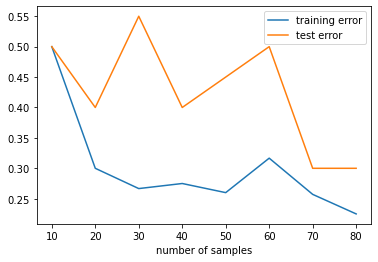

In [71]:
plotErrors_samples(np.arange(10,90,10), trainError_sample3, validError_sample3)

# 2. Bayes value

A pharmaceutical company developed a test for detecting the rare disease, which is carried by 0.5 % cases of the whole population. Let’s assume that the test gives positive results for 96% of the cases if the patient is ill, but it also gives positive results in 5% of the healthy patient. What is the probability that a patient is ill if his test gave a positive result?

The natural solution to this problem is (almost the same as https://www.youtube.com/watch?v=R13BD8qKeTg). 

The probability that a patient is ill if their test gave a positive result can be expressed as conditional probability (probability of the patient being ill conditioned on the positive diagnosis):

(1) $$P(\text{ill}|P)=\frac{P(P|\text{ill})\cdot P(\text{ill})}{P(P)}.$$

From the Law of Total probability (https://en.wikipedia.org/wiki/Law_of_total_probability) we have:

(2) $$P(P)=P(ill) \cdot P(P|ill)+P(-ill) \cdot P(P|-ill).$$

Consequently, if we combine (1) and (2) we will get:
      
(3) $$P(\text{ill}|P)=\frac{P(P|\text{ill})\cdot P(\text{ill})}{P(ill) \cdot P(P|ill)+P(-ill) \cdot P(P|-ill)}.$$

It was specified in the describtion of the probelm that:

$$P(\text{ill})=0.005,$$

$$P(-\text{ill})=0.995,$$

$$P(P|\text{ill})=TP=0.960,$$

$$P(P|\text{-ill})=FP=0.050.$$

In [30]:
#Calculations
P_ill=0.005
P_not_ill=0.995
P_P_ill=0.960
P_P_not_ill=0.050 

P_ill_P=((P_P_ill*P_ill)/(P_ill*P_P_ill+P_not_ill*P_P_not_ill))

print("The probability that the patient is ill on condition that they were positively diagnosed is: {:.4g}%.".format(100*P_ill_P))

The probability that the patient is ill on condition that they were positively diagnosed is: 8.799%.


# 3.Expected Value Problem

a). Let $g(X) = 1$ for some set $A$ being a subset of sample space $\Omega$. What is the interpretation of $E[g(X)]$ if is discrete with a given PMF or continuous with a given PDF?

In order to solve this problem we have to make an assumption about the values of $g(x)$ for $x\notin A$. Since the author of this question did not specify what happens for x from within $\Omega$ but outside of $A$ region we have taken the liberty to specify function $g(x)$ in a little bit more detail.

$$g(x)= 
     \begin{cases}
      &1, x\in A\\
      &0, x\notin A
     \end{cases}.$$
     
For continuous $x \in A$:
$$E\left[g(X)\right]=\int_{\Omega}g(x)\cdot f_{x}(x) dx=\int_{\Omega} f_{x}(x) dx = 1,$$

where in accordance to the lecture $f_{x}(x)$ is PDF function.  

For discrete $k\in A$ and function $g(x)$ defined in the aforementioned way it is only natural to conclude that:

$$E\left[g(X)\right]=\int_{\Omega}g(x)\cdot f_{x}(x) \cdot \delta(x-k) dx=\sum_{k\in A}g(k)\cdot p_{x}(k)=\sum_{k\in A}p_{x}(k)=1,$$

where $p_{x}(k)$ is the PMF function.

The above equation can be trivially generalised to $n$ dimensions: $$x\rightarrow (x_{1},x_{2},.....,x_{n}),$$ $$dx\rightarrow dx_{1}dx_{2}...dx_{n}.$$

b).What is the interpretation of $E\left[g(X)\right]$ for $g(X)=x$?


$$E\left[g(X)\right]=\int_{\Omega}g(x)\cdot f_{x}(x) dx=\int_{\Omega}x\cdot f_{x}(x) dx.$$



# k-NN, stability, and generalization

Let’s assume that we use kNN model to perform the classification of two type of objects (think of spam/non-spam) with k=2, k =3 and k=10 and N=100 training samples with 2 features each e.g. { X(1)=[0,1], X(2)=[-1,2],  X(3)=[2,2], X(4)=[0,0.3], …,  X(100)=[-100,12,5] }   and  {Y(1)=[0], Y(2)=[1], Y(3)=[1], Y(4)=[0]]

For which k value do we expect the smallest training error? 

k=2

For which k value do we expect the highest stability? 

k=10

For which k value do we expect the smallest stability? 

k=2

How would we classify X=[0,0] if we use the first 4 training samples for k=1? 

k=0

How would we classify X=[0,0] if we use the first 4 training samples for k=2? 

k=0

How would we classify X=[0,0] if we use the first 4 training samples for k=3? 

k=0

We increase the training sample to N=101. How we expect to affect the stability of different k values? 

Remains the same for higher k if we some data points but for smaller k this might change.

Now instead of kNN model we the use linear regression. Discuss the stability issue.

It is lower. Linear regression is more susceptible to outliers. 